In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\singhegm\Downloads\b7bb9fd3d67874b41ffda7bcf0bd1631\itronix\GroceryStoreDataSet.csv', header = None)
df.head()

,0,1,2,3
0,MILK,BREAD,BISCUIT,NaN
1,BREAD,MILK,BISCUIT,CORNFLAKES
2,BREAD,TEA,BOURNVITA,NaN
3,JAM,MAGGI,BREAD,MILK
4,MAGGI,TEA,BISCUIT,NaN


In [3]:
df = pd.read_csv(r'C:\Users\singhegm\Downloads\b7bb9fd3d67874b41ffda7bcf0bd1631\itronix\GroceryStoreDataSet.csv', header = None)
df.head()

,0,1,2,3
0,MILK,BREAD,BISCUIT,NaN
1,BREAD,MILK,BISCUIT,CORNFLAKES
2,BREAD,TEA,BOURNVITA,NaN
3,JAM,MAGGI,BREAD,MILK
4,MAGGI,TEA,BISCUIT,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20 non-null     object
 1   1       20 non-null     object
 2   2       19 non-null     object
 3   3       7 non-null      object
dtypes: object(4)
memory usage: 768.0+ bytes


In [5]:
df.isna().sum().sort_values(ascending = False)

3    13
2     1
0     0
1     0
dtype: int64

In [6]:
df.values.tolist()

[['MILK', 'BREAD', 'BISCUIT', nan],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA', nan],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT', nan],
 ['BREAD', 'TEA', 'BOURNVITA', nan],
 ['MAGGI', 'TEA', 'CORNFLAKES', nan],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK', nan, nan],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA', nan],
 ['BREAD', 'COFFEE', 'COCK', nan],
 ['BREAD', 'SUGER', 'BISCUIT', nan],
 ['COFFEE', 'SUGER', 'CORNFLAKES', nan],
 ['BREAD', 'SUGER', 'BOURNVITA', nan],
 ['BREAD', 'COFFEE', 'SUGER', nan],
 ['BREAD', 'COFFEE', 'SUGER', nan],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [7]:
len(df)

20

In [8]:
T = []
for i in range(len(df)):
    T.append([str(df.values[i, j]) for j in range(0, 4) if str(df.values[i, j]) != 'nan'])

In [9]:
T

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [10]:
from apyori import apriori

rules = apriori(T, min_support = 0.03, min_confidence = 0.35, min_lift = 3, min_length = 2)

In [11]:
results = list(rules)
results

[RelationRecord(items=frozenset({'MAGGI', 'JAM'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'JAM'}), items_add=frozenset({'MAGGI'}), confidence=1.0, lift=4.0), OrderedStatistic(items_base=frozenset({'MAGGI'}), items_add=frozenset({'JAM'}), confidence=0.4, lift=4.0)]),
 RelationRecord(items=frozenset({'COFFEE', 'BISCUIT', 'COCK'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'COCK'}), items_add=frozenset({'COFFEE', 'BISCUIT'}), confidence=0.6666666666666667, lift=6.666666666666667), OrderedStatistic(items_base=frozenset({'COFFEE', 'BISCUIT'}), items_add=frozenset({'COCK'}), confidence=1.0, lift=6.666666666666667)]),
 RelationRecord(items=frozenset({'BISCUIT', 'COCK', 'CORNFLAKES'}), support=0.1, ordered_statistics=[OrderedStatistic(items_base=frozenset({'COCK'}), items_add=frozenset({'BISCUIT', 'CORNFLAKES'}), confidence=0.6666666666666667, lift=4.4444444444444455), OrderedStatistic(items_base=frozenset({'BISCUIT', 'COCK'}), ite

In [12]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Item A', 'Item B', 
                                                               'Support', 'Confidence', 'Lift'])

In [13]:
resultsinDataFrame

,Item A,Item B,Support,Confidence,Lift
0,JAM,MAGGI,0.10,1.000000,4.000000
1,COCK,COFFEE,0.10,0.666667,6.666667
2,COCK,BISCUIT,0.10,0.666667,4.444444
3,COFFEE,CORNFLAKES,0.10,1.000000,3.333333
4,MAGGI,BISCUIT,0.10,0.400000,4.000000
5,BOURNVITA,SUGER,0.05,1.000000,3.333333
6,BREAD,MILK,0.05,1.000000,4.000000
7,JAM,MAGGI,0.10,1.000000,6.666667
8,COCK,COFFEE,0.10,0.666667,3.333333
9,MILK,CORNFLAKES,0.05,1.000000,3.333333


In [14]:
final = resultsinDataFrame.nlargest(n = 10, columns = 'Lift')
final

,Item A,Item B,Support,Confidence,Lift
13,JAM,MAGGI,0.05,0.500000,10.000000
15,MILK,BREAD,0.05,0.500000,10.000000
18,JAM,MAGGI,0.05,0.500000,10.000000
20,MILK,TEA,0.05,1.000000,10.000000
1,COCK,COFFEE,0.10,0.666667,6.666667
7,JAM,MAGGI,0.10,1.000000,6.666667
17,COCK,COFFEE,0.10,0.666667,6.666667
19,JAM,MAGGI,0.05,0.500000,5.000000
2,COCK,BISCUIT,0.10,0.666667,4.444444
0,JAM,MAGGI,0.10,1.000000,4.000000


In [15]:
for item in results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: MAGGI -> JAM
Support: 0.1
Confidence: 1.0
Lift: 4.0
Rule: COFFEE -> BISCUIT
Support: 0.1
Confidence: 0.6666666666666667
Lift: 6.666666666666667
Rule: BISCUIT -> COCK
Support: 0.1
Confidence: 0.6666666666666667
Lift: 4.4444444444444455
Rule: COFFEE -> BISCUIT
Support: 0.1
Confidence: 1.0
Lift: 3.3333333333333335
Rule: MAGGI -> BISCUIT
Support: 0.1
Confidence: 0.4
Lift: 4.0
Rule: BOURNVITA -> COFFEE
Support: 0.05
Confidence: 1.0
Lift: 3.3333333333333335
Rule: MILK -> BREAD
Support: 0.05
Confidence: 1.0
Lift: 4.0
Rule: MAGGI -> BREAD
Support: 0.1
Confidence: 1.0
Lift: 6.666666666666667
Rule: COFFEE -> COCK
Support: 0.1
Confidence: 0.6666666666666667
Lift: 3.3333333333333335
Rule: MILK -> COFFEE
Support: 0.05
Confidence: 1.0
Lift: 3.3333333333333335
Rule: COFFEE -> TEA
Support: 0.05
Confidence: 1.0
Lift: 3.3333333333333335
Rule: MILK -> COFFEE
Support: 0.05
Confidence: 1.0
Lift: 4.0
Rule: MILK -> TEA
Support: 0.05
Confidence: 1.0
Lift: 3.3333333333333335
Rule: MAGGI -> MILK
Support: 

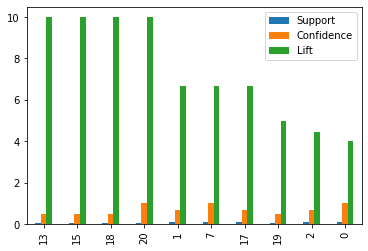

In [16]:
import matplotlib.pyplot as plt

final.plot.bar()
plt.show()

In [17]:
print(final['Item A'].value_counts())

JAM     5
COCK    3
MILK    2
Name: Item A, dtype: int64


In [18]:
print(final['Item B'].value_counts())

MAGGI      5
COFFEE     2
TEA        1
BREAD      1
BISCUIT    1
Name: Item B, dtype: int64


In [19]:
D = df.values.ravel()   # ravel converts 2D array into 1D
D

array(['MILK', 'BREAD', 'BISCUIT', nan, 'BREAD', 'MILK', 'BISCUIT',
       'CORNFLAKES', 'BREAD', 'TEA', 'BOURNVITA', nan, 'JAM', 'MAGGI',
       'BREAD', 'MILK', 'MAGGI', 'TEA', 'BISCUIT', nan, 'BREAD', 'TEA',
       'BOURNVITA', nan, 'MAGGI', 'TEA', 'CORNFLAKES', nan, 'MAGGI',
       'BREAD', 'TEA', 'BISCUIT', 'JAM', 'MAGGI', 'BREAD', 'TEA', 'BREAD',
       'MILK', nan, nan, 'COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES',
       'COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES', 'COFFEE', 'SUGER',
       'BOURNVITA', nan, 'BREAD', 'COFFEE', 'COCK', nan, 'BREAD', 'SUGER',
       'BISCUIT', nan, 'COFFEE', 'SUGER', 'CORNFLAKES', nan, 'BREAD',
       'SUGER', 'BOURNVITA', nan, 'BREAD', 'COFFEE', 'SUGER', nan,
       'BREAD', 'COFFEE', 'SUGER', nan, 'TEA', 'MILK', 'COFFEE',
       'CORNFLAKES'], dtype=object)

In [20]:
import collections
val = collections.Counter(D)
val

Counter({'MILK': 5,
         'BREAD': 13,
         'BISCUIT': 7,
         nan: 14,
         'CORNFLAKES': 6,
         'TEA': 7,
         'BOURNVITA': 4,
         'JAM': 2,
         'MAGGI': 5,
         'COFFEE': 8,
         'COCK': 3,
         'SUGER': 6})

In [21]:
val.items()

dict_items([('MILK', 5), ('BREAD', 13), ('BISCUIT', 7), (nan, 14), ('CORNFLAKES', 6), ('TEA', 7), ('BOURNVITA', 4), ('JAM', 2), ('MAGGI', 5), ('COFFEE', 8), ('COCK', 3), ('SUGER', 6)])

In [22]:
fd = pd.DataFrame(val.items())
fd

,0,1
0,MILK,5
1,BREAD,13
2,BISCUIT,7
3,NaN,14
4,CORNFLAKES,6
5,TEA,7
6,BOURNVITA,4
7,JAM,2
8,MAGGI,5
9,COFFEE,8


In [23]:
fd = fd.rename(columns = {0: 'items', 1: 'Total'})
fd

,items,Total
0,MILK,5
1,BREAD,13
2,BISCUIT,7
3,NaN,14
4,CORNFLAKES,6
5,TEA,7
6,BOURNVITA,4
7,JAM,2
8,MAGGI,5
9,COFFEE,8


In [24]:
fd.sort_values(by = 'Total', ascending = False)[1:]  # lets ignore NaN value and take from row 1

,items,Total
1,BREAD,13
9,COFFEE,8
2,BISCUIT,7
5,TEA,7
4,CORNFLAKES,6
11,SUGER,6
0,MILK,5
8,MAGGI,5
6,BOURNVITA,4
10,COCK,3
